# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [4]:
# Matriz de dados
data_matriz = df.to_numpy()

# Vetores para multiplicação
vetor_media = np.array([[0.5], [0.5]])
vetor_diferenca = np.array([[1], [-1]])

# Cálculo da média e diferença usando multiplicação matricial
media = data_matriz @ vetor_media
diferenca = data_matriz @ vetor_diferenca

# Convertendo os resultados para DataFrame para uma melhor visualização
resultados = pd.DataFrame({
    'Média (p1, p2)': media.flatten(),
    'Diferença (p1 - p2)': diferenca.flatten()
})

resultados.head()

,"Média (p1, p2)",Diferença (p1 - p2)
0,7.454060,-0.978736
1,3.980465,-2.238143
2,1.621472,1.294085
3,4.993754,1.038788
4,8.066546,-1.743712


In [5]:
# Cálculo da correlação entre p1 e p2
correlacao = df.corr()
correlacao

,p1,p2
p1,1.000000,0.895737
p2,0.895737,1.000000


In [6]:
# Criando DataFrame com as transformações de média e diferença
transformados_df = pd.DataFrame({
    'Média': media.flatten(),
    'Diferença': diferenca.flatten()
})

# Cálculo da correlação entre média e diferença
correlacao_transformados = transformados_df.corr()
correlacao_transformados

,Média,Diferença
Média,1.000000,-0.133474
Diferença,-0.133474,1.000000


## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

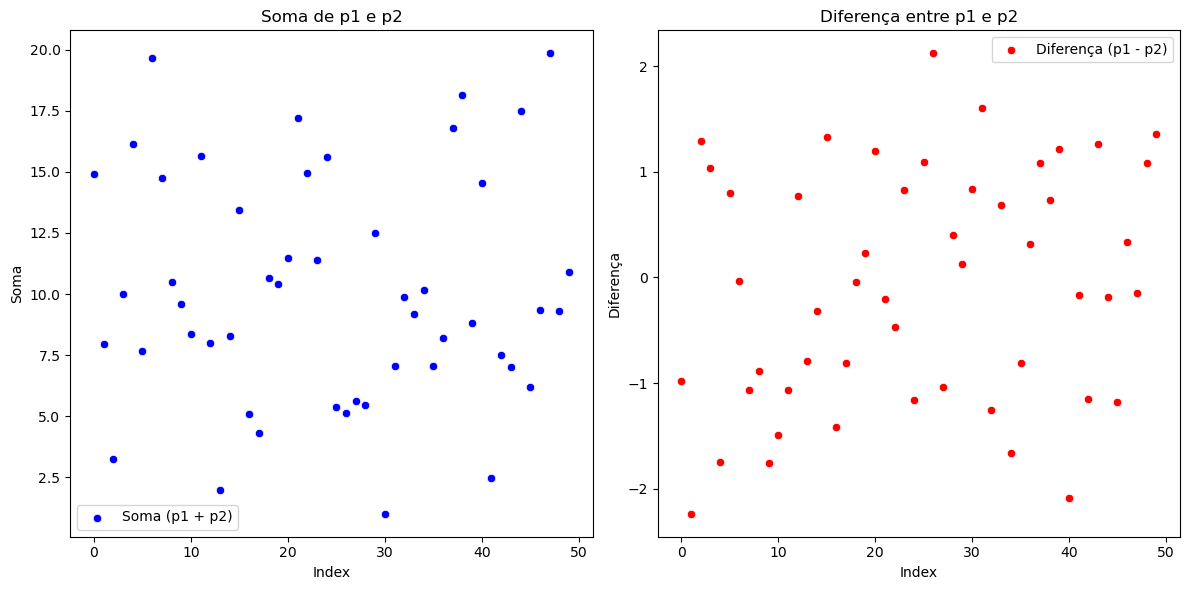

In [7]:
# Calculando a soma de p1 e p2
soma = data_matrix @ np.array([[1], [1]])

# Adicionando a soma ao DataFrame existente para comparação
transformados_df['Soma'] = soma.flatten()

# Plotando gráficos para visualizar as transformações
plt.figure(figsize=(12, 6))

# Gráfico da soma
plt.subplot(1, 2, 1)
sns.scatterplot(x=transformados_df.index, y='Soma', data=transformados_df, color='blue', label='Soma (p1 + p2)')
plt.title('Soma de p1 e p2')
plt.xlabel('Index')
plt.ylabel('Soma')

# Gráfico da diferença
plt.subplot(1, 2, 2)
sns.scatterplot(x=transformados_df.index, y='Diferença', data=transformados_df, color='red', label='Diferença (p1 - p2)')
plt.title('Diferença entre p1 e p2')
plt.xlabel('Index')
plt.ylabel('Diferença')

plt.tight_layout()
plt.show()